<a href="https://colab.research.google.com/github/UtkarshRasal/deep_learning/blob/master/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch workflow fundamentals

In [3]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [4]:
import torch
from torch import nn
from matplotlib import pyplot as plt

## Data Preparation

In [5]:
# create "known" parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step)
y = weight * X + bias

In [6]:
X, y, X[:10], y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160,
         0.9300, 0.9440, 0.9580, 0.9720, 0.9860]),
 tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
       

In [7]:
# creating train and test sets
train_split = int(0.8 * len(X)) # 80% data will be used for training
X_train, y_train = X[:train_split], y[:train_split] # 0 to 80% data will be used for training
X_test, y_test = X[train_split:], y[train_split:] # and remaining 20% (80% to 100%) data will be used to test the model
X_train, X_test, y_train, y_test

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]),
 tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460]),
 tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
         0.9860]))

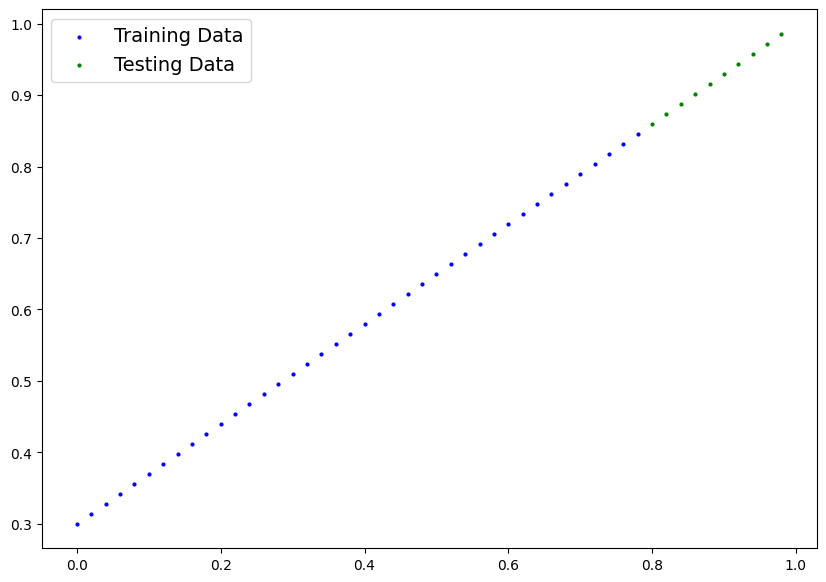

In [8]:
# creating a function to plot the train and test data
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')

  # plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing Data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  plt.legend(prop={"size": 14})


plot_predictions()



## Build Model

In [9]:
# create a model with linear regression model class
class LinearRegressionModel(nn.Module): # nn.module base class for all neural network modules
  def __init__(self):
    # this is used to call the init method of the nn.module subclass,
    # ensuring that all features of nn.Module are properly initialized
    super().__init__()

    # Initialize the model parameters
    # nn.Parameter is used to created parameters that can be optimized during training
    # required_grad = True means that pytorch will track gradients of this parameter during training, which will be helpful in optimization
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float,requires_grad=True))

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    # applying the linear function => y = mx + b
    return self.weights * x + self.bias

### theory about above model and neural networks

* torch has predefined neural network library called 'nn'
* torch.nn => contains all the building blocks for computional graphs
* torch.nn.module =>
  * this is base class for all neural networks modules.
  * If you're building neural network in pytorch then your models should sub class nn.Module and a forward() function should be implemented.
  * Inheriting from nn.module allows are custom model to get useful features like parameter management and automatic differentiation
* torch.optim => contains various optimization algorithms to tell the model how to best change to improve gradient descent in order to reduce the loss
* def forward() => all nn.module classes requires a forward function to be implemented. This defined the computation that will take place on the data passed to the particular nn module
*


In [10]:
# check the content of out linear regression model

torch.manual_seed(42) # nn.Parameter will randomly initialize tensors

model_0 = LinearRegressionModel()

list(model_0.parameters()) # check the parameters created in the model

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# Make predictions with model

# this torch.inference_mode() is used for inference (making predictions)
# Using torch.inference_mode() as context_manager ( with statement )
# torch.inference_mode() turns off bunch of things to make forward() function faster like gradient tracking which is required for training but not for predictions
with torch.inference_mode():
  y_preds = model_0(X_test)

print(f"Number of testing samples - {len(X_test)}")
print(f"Number of predictions made - {len(y_preds)}")
# print(f"Samples - {X_test}")
print(f"Predictions - {y_preds}")


Number of testing samples - 10
Number of predictions made - 10
Predictions - tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


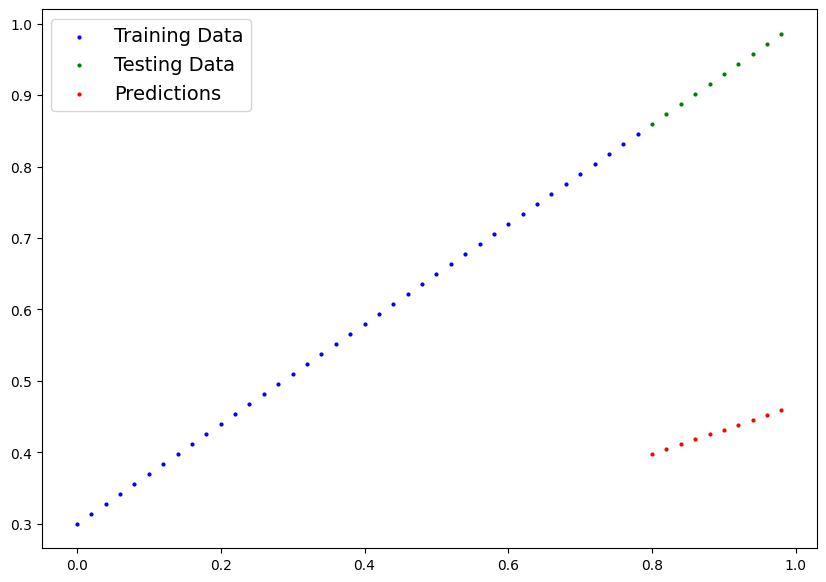

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
# now above graphs tells that the prediction is very very wrong
y_test - y_preds

tensor([0.4618, 0.4691, 0.4764, 0.4836, 0.4909, 0.4982, 0.5054, 0.5127, 0.5200,
        0.5272])

In [14]:
# Time to change this, Now we will begin with Training our model

## Training Model

* Right now the model is using random parameters to calculate and make predictions, basically its guessing.
* To fix that, we can make changes to its parameters ,the weights and bais parameters.
* For the model to update its parameters we will Loss functions and optimizers to make the predictions

* Loss function
  * It measures how wrong your models predictions are as compared to the test data
  * pytorch has plenty of built-in loss functions like:
    * Mean Absolute Error (MAE) for regression problems -> torch.nn.L1Loss()
    * Binary Cross Entropy for Binary Classification -> torch.nn.BCELoss()

* Optmizer
  * Tells the model to how to update its internal parameters to best lower its value
  * You can find various optimization function implementations in torch.optim.
    * Stochastic gradient descent -> torch.optim.SGD()
    * Adam Optimizer -> torch.optim.Adam()  


In [15]:
# Lets create a loss function and an optimizer to improve our model
# Since we are predicting numbers, we will use Mean Absolute Error (MAE) Loss function -> torch.nn.L1Loss()

# Mean absolute error measures the absolute difference between two points (see in below image) and then take the mean.

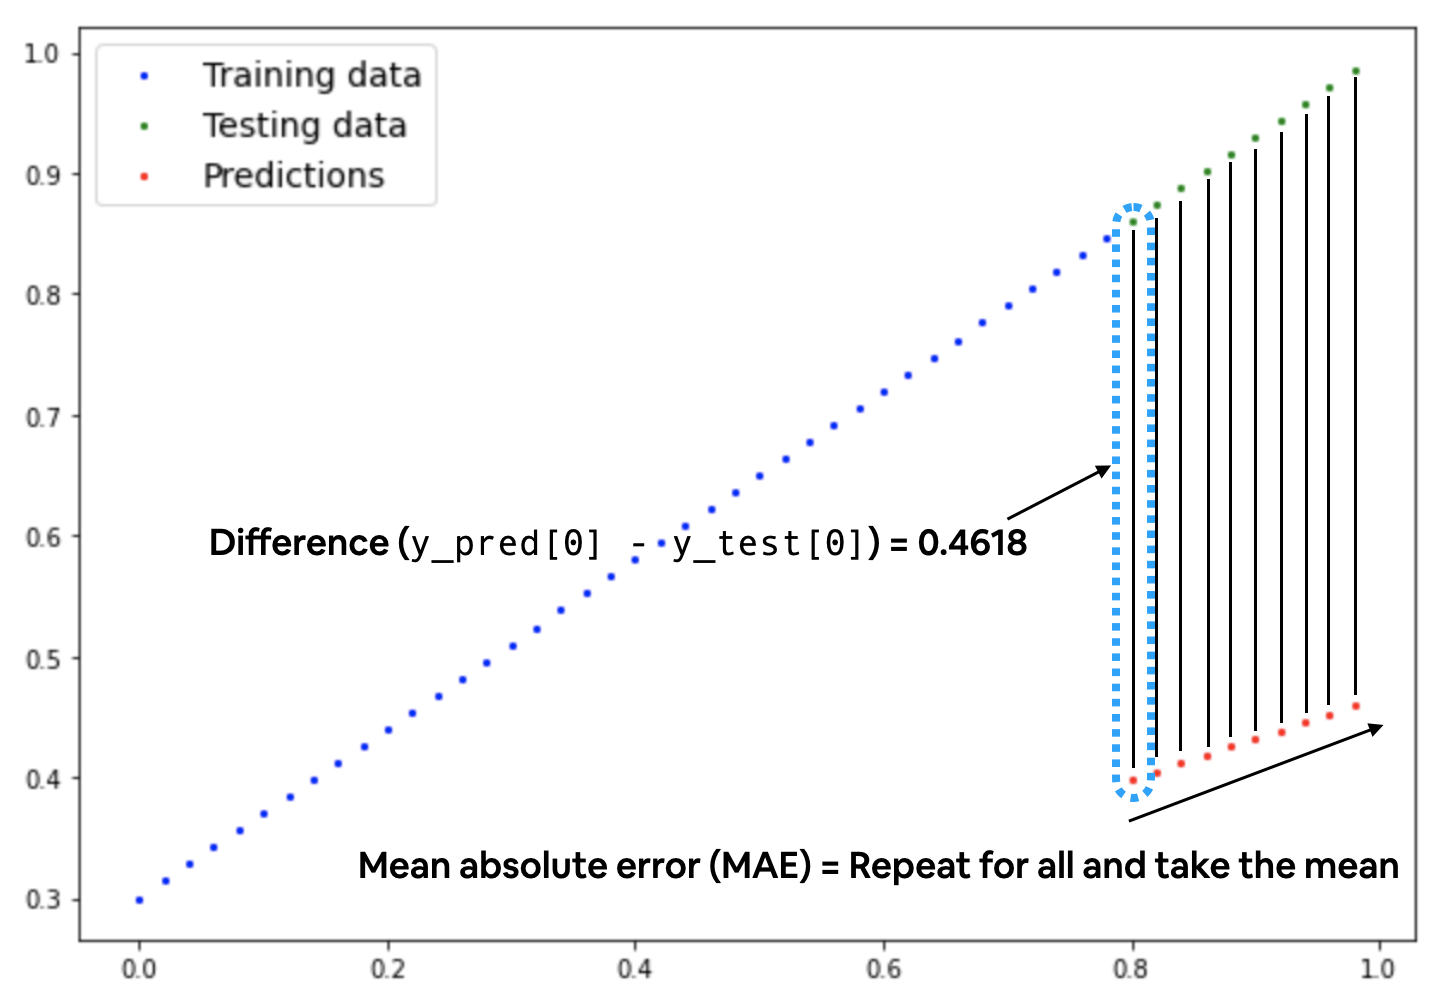

In [16]:
# Just a code to see the image explain in the tutorial i'm using
from PIL import Image
import requests
url = 'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-mae-loss-annotated.png'
im = Image.open(requests.get(url, stream=True).raw)
im

In [17]:
# We'll use Stochastic Gradient Descent as Optimizer

# torch.optim.SGD(pararms, lr)

## params is the parameters we want to optimize like weights and bias
## lr is the learning rate you'd like to update the paramaters at. Also known as the hyper parameter
### Higher means the optimizer will take larger updates and lower means the optimizer will take smaller updates
### Common starting values for the learning rates are 0.01, 0.001, 0.0001

In [18]:
# creat loss and optimizer function
loss_fn = torch.nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [19]:
# creating a training loop

# The training loop involves the model going through the training data and learning the relationships between the features and labels.


### Pytorch loop theme song

* Its train time,
* Do the forward pass,
* Calculate the loss,
* optimizer zero grad
* lossss backwards.

* Optmizer step step step

* Lets test now,
* with torch no grad,
* do the forward pass,
* calculate the loss,
* watch it go down down down

In [20]:
# model training with number epochs (epoch is the number of times a model is trained, kind of range of a loop)

torch.manual_seed(42)

epochs_count=[]
train_loss_values=[]
test_lost_values=[]
def train_model(epochs):


  for epoch in range(epochs):

    ### TRAINING

    # put the model in training mode
    model_0.train()

    # pass the data through the model, this will perform forward() pass on all data
    train_preds = model_0(X_train)

    # calculate the loss, how different are the values from the true values
    loss = loss_fn(train_preds, y_train)

    # zero the gradients of the optimizer
    optimizer.zero_grad()

    # perform back propogation on the loss
    loss.backward()

    # Progress the optimizer to update the parameters of the model
    optimizer.step()

    ### TESTING

    # put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # forward pass on test data
      test_preds = model_0(X_test)

      # calculate loss
      test_loss = loss_fn(test_preds, y_test.type(torch.float))

      # Print out whats happening
      if(epoch % 10 == 0):
          epochs_count.append(epoch)
          train_loss_values.append(loss.detach().numpy())
          test_lost_values.append(test_loss.detach().numpy())
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


# call the train_model functions with 100 epochs
train_model(100)



Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


In [21]:
# so by looking at the above output we can say that our losses are going down after every epoch


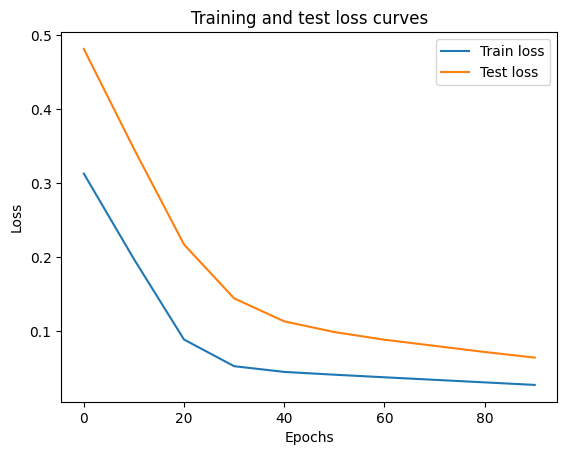

In [22]:
# Plot the loss curves
plt.plot(epochs_count, train_loss_values, label="Train loss")
plt.plot(epochs_count, test_lost_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [23]:
# The loss curves show the loss going down over time.
# Remember, loss is the measure of how wrong your model is, so the lower the better.

In [24]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## Test the Trained model

In [25]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

print(y_preds)

tensor([0.8141, 0.8256, 0.8372, 0.8488, 0.8603, 0.8719, 0.8835, 0.8950, 0.9066,
        0.9182])


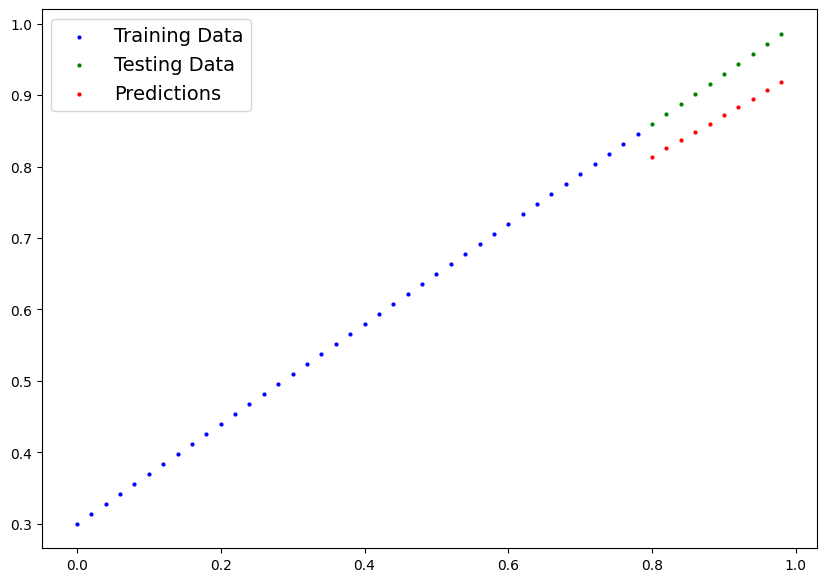

In [26]:
plot_predictions(predictions=y_preds)

## Saving a pytorch model

* the recomended way to save a model is to save its state_dict()
* for saving => torch.save(obj, f) ---> obj is the target models state_dict() and f is the file_path
* It's common convention for PyTorch saved models or objects to end with .pt or .pth, like saved_model_01.pth.

In [28]:
from pathlib import Path

# create model directory
MODEL_PATH = Path('model')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create mode save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state_dict()
print(f"Saving model save path - {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model save path - model/01_pytorch_workflow_model.pth


## Loading Pytorch Model

* Since we are saving the model state_dict(), we can load the model by using torch.nn.Module.load_state_dict(torch.load(f)) => f is the model path
* We first have to load the state_dict() using torch.load(f) and pass the state dict to torch.nn.Module.load_state_dict()

In [29]:
# instantiate a new model
loaded_model_0 = LinearRegressionModel()

# load the state dict of the saved model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-29-80d160fb33c1>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

## Testing the loaded odel

In [30]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([0.8141, 0.8256, 0.8372, 0.8488, 0.8603, 0.8719, 0.8835, 0.8950, 0.9066,
        0.9182])

In [31]:
y_preds == loaded_model_preds

tensor([True, True, True, True, True, True, True, True, True, True])

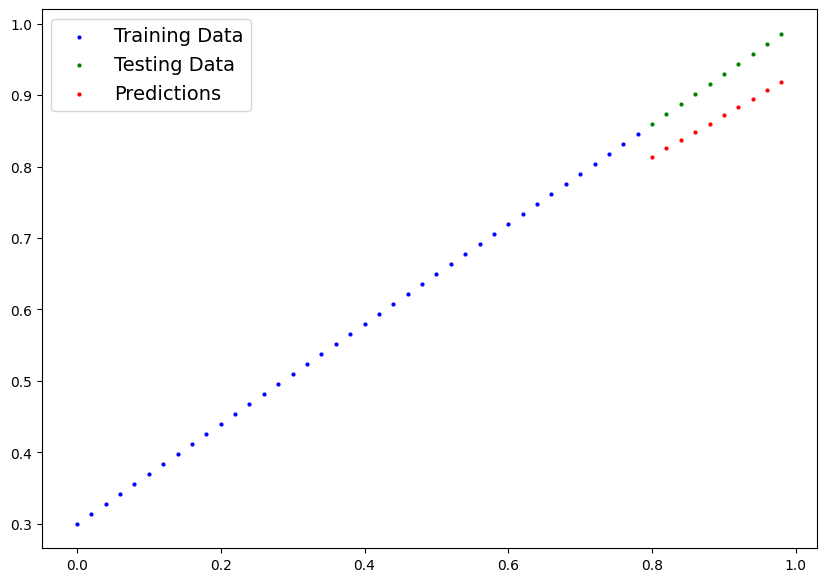

In [32]:
# plot the loaded models prediction
plot_predictions(predictions=loaded_model_preds)